In [69]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import requests
sn.set_style('whitegrid')

%matplotlib inline

In [2]:
# import the cleaned data
trip = pd.read_csv('trip_master_clean.csv')

In [3]:
trip.head()

,bike_type,start_time,end_time,user_type,trip_duration,start_time_weekday,start_time_hour,end_time_hour,start_day_period
0,electric_bike,2020-05-18 22:16:00,2020-05-18 22:28:00,casual,12.0,Monday,22,22,night
1,electric_bike,2020-05-19 16:57:00,2020-05-19 17:29:00,casual,32.0,Tuesday,16,17,afternoon
2,electric_bike,2020-05-18 20:08:00,2020-05-18 20:14:00,casual,6.0,Monday,20,20,night
3,electric_bike,2020-05-19 14:05:00,2020-05-19 14:14:00,casual,9.0,Tuesday,14,14,afternoon
4,electric_bike,2020-05-10 17:45:00,2020-05-10 18:29:00,casual,44.0,Sunday,17,18,afternoon


## Univariate Exploration

### How is the hourly trip distributed?

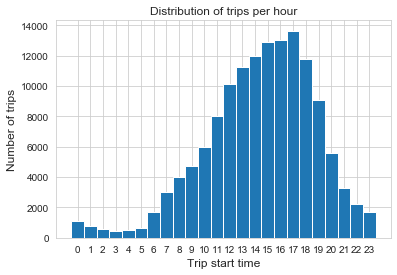

In [37]:
# Distribution of start time for trips
bins = np.arange(0, 25, 1)
plt.hist(trip['start_time_hour'], bins = bins)
xticks = np.arange(0.5, 24, 1) 
labels = np.arange(0, 24, 1)
plt.xticks(xticks, labels)
plt.title('Distribution of trips per hour')
plt.xlabel('Trip start time', fontsize = 12)
plt.ylabel('Number of trips', fontsize = 12) ;

> As expected, less number of trips occurred during the night hours as people would naturally prefer to sleep in the night. On the other hand, the majority of trips occurred during the day, with 18:00 hrs, having the most trips. This could be due to cool weather associated with evening periods of the day. 

> Overall, the distribution is approximately normal.

### How is trip duration distributed?

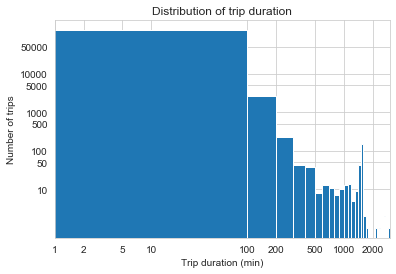

In [5]:
# Distribution of trip durations
bins = np.arange(0, np.max(trip.trip_duration), 100)
plt.hist(trip['trip_duration'], bins = bins)
locx = [1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000] 
locy = [10, 50, 100, 500, 1000, 5000, 10000, 50000]
labelx = ['{}'.format(val) for val in locx]
labely = ['{}'.format(val) for val in locy]
plt.title('Distribution of trip duration')
plt.xlabel('Trip duration (min)')
plt.ylabel('Number of trips')
plt.xscale('log')
plt.yscale('log')
plt.xticks(locx, labelx)
plt.yticks(locy, labely)
plt.xlim(1,3000);

> Due to the large range of trip duration, I have transformed both axes to log scale and applied custom tick marks to demonstrate the log scaling. I have also focused on trip duration of 3000 minutes or less, as the data is overwhelmed by outliers.

 > It is also evident from the visual that most of the trips occurred in 100mins or less, which suggest that the bike riders are doing short distances.

### How is bike type distributed?

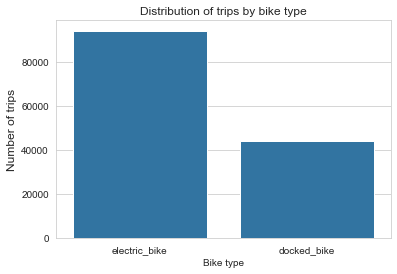

In [36]:
# Distribution of trips by bike type
color = sn.color_palette()[0]
sn.countplot(data = trip, x = 'bike_type', color = color)
plt.title('Distribution of trips by bike type')
plt.xlabel('Bike type')
plt.ylabel('Number of trips', fontsize = 12);

> People find it more convienent to use electric bikes compared to docked type. The inbuilt motor in electric bike that is used for propulsion could be an attributor to this trend in bike usage for trips.

### How is trips by users distributed?

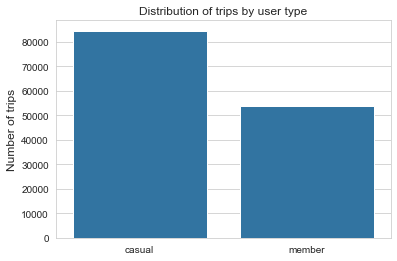

In [35]:
# Distribution of trips by user type
color = sn.color_palette()[0]
sn.countplot(data = trip, x = 'user_type', color = color)
plt.title('Distribution of trips by user type')
plt.xlabel('')
plt.ylabel('Number of trips', fontsize = 12);

> The Forgo bike company has a higher percentage of patronage from the non-subscribed users. This perhaps could mean that the casual users are more in number. 

> Companies usually offer incentive services to registered members, which would increase their patronage and even attract non-members to subscribe. So, the above trend suggests a high number of casual users.

### What is the daily distribution of trips?

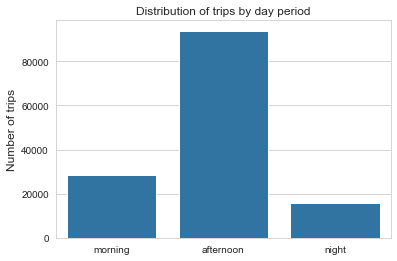

In [34]:
# Distribution of trips by day period
color = sn.color_palette()[0]
order = ['morning', 'afternoon', 'night']
sn.countplot(data = trip, x = 'start_day_period', color = color, order=order)
plt.title('Distribution of trips by day period')
plt.xlabel('')
plt.ylabel('Number of trips', fontsize = 12);

> As observed in the hourly trip distribution, most trips are taken in the afternoon period of the day.

### How are weekly trips distributed?

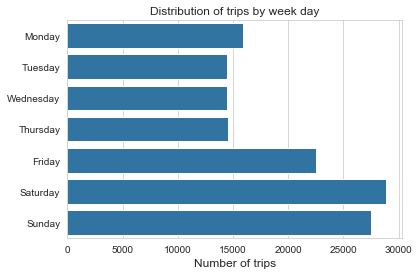

In [42]:
# Distribution of trips by user type
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
color = sn.color_palette()[0]
sn.countplot(data = trip, y = 'start_time_weekday', color = color, order = order)
plt.title('Distribution of trips by week day')
plt.xlabel('Number of trips', fontsize = 12)
plt.ylabel('');

> The trend shows that most trips occur on weekends. This also gives a little insight into the user type distribution above. It can be reasoned that subscribed members are those that use the Fordgo bike services for daily commuting to work whereas casual users only fancy the company services on weekend probably for outdoor activites.

> However, this would be more clear during the bivariate exploration.

## Bivariate Exploration

### Does trip duration depend on bike type?

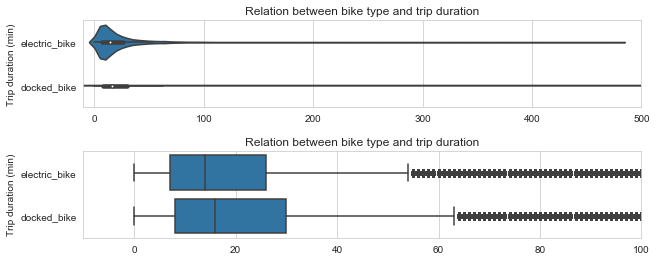

In [10]:
#Relation between bike type and trip duration
fig = plt.figure(figsize=[10,4])
plt.subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
sn.violinplot(data = trip, y = 'bike_type', x = 'trip_duration')
plt.title('Relation between bike type and trip duration')
plt.ylabel('Trip duration (min)')
plt.xlabel('')
plt.xlim(-10,500)

plt.subplot(2,1,2)
sn.boxplot(data = trip, y = 'bike_type', x = 'trip_duration', color = color)
plt.title('Relation between bike type and trip duration')
plt.ylabel('Trip duration (min)')
plt.xlabel('')
plt.xlim(-10,100);

> The box plot reviews that rides with electric bikes takes lesser time. This is anticipated as the inbuilt motor which helps in propulsion makes the bike move faster.

> The violin plot also revealed that majority of trips done with electric bikes are less less than 50 mins, as indicated by the density curve, which supports the observation from the box plot.

> There are more outliers  for docked bikes.

### What's the average trip duration for each bike?

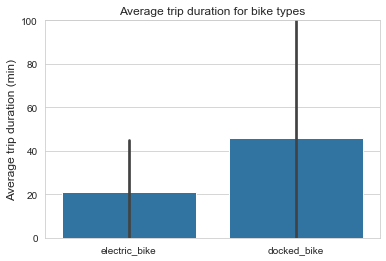

In [32]:
# Average trip duration for bike types
sn.barplot(data = trip, x = 'bike_type', y = 'trip_duration', 
           color = color, ci = 'sd')
plt.title('Average trip duration for bike types', fontsize = 12)
plt.ylabel('Average trip duration (min)', fontsize = 12)
plt.xlabel('')
plt.ylim(0,100);

> The average trip duration for electric bikes is about 20 minutes, whereas the docked bikes are more than twice higher. It would be anticipated that users would prevail a faster bike. However, we would have a full grasp of this when we do a multivariate exploration of bike type, user type and trip duration.

> The error bars represent the standard deviations of bikes' trip durations, which is more wield for the docked bikes.

### Does trips started at some periods of the day take longer duration?
Since the there are multiple observation for each hour, we would summarize the data before ploting to make the plot more meaningful.

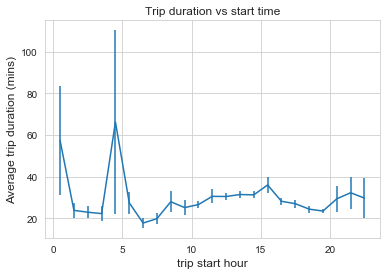

In [31]:
# Let's start by creating bin sizes and centers
bin_size = 1
hour_bin = np.arange(0, trip['start_time_hour'].max()+bin_size, bin_size)
bin_center = (hour_bin + bin_size/2)[:-1]

# Use pandas cut function to aggregate the trip durations based on the bin
# compute mean in each bin
hour_binned = pd.cut(trip['start_time_hour'], hour_bin, right = False, include_lowest = True)
duration_mean = trip['trip_duration'].groupby(hour_binned).mean()
duration_sem = trip['trip_duration'].groupby(hour_binned).sem()

# plot the summarized data
plt.errorbar(x = bin_center, y = duration_mean, yerr=duration_sem)
plt.xlabel('trip start hour', fontsize = 12)
plt.ylabel('Average trip duration (mins)', fontsize = 12)
plt.title('Trip duration vs start time');

> Average trip durations are generally similar except for the spikes around 12am and 4-5am. We would explore the type of bike associated with this spike later. There's also high variability in the spike regions.

### Which user type patronized the bike company more across the week?

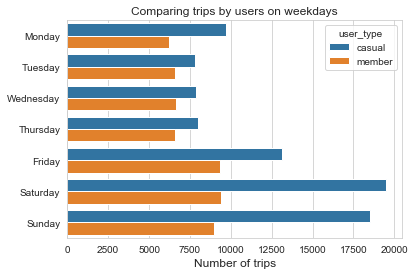

In [43]:
# Comparing trips by users on weekdays
sn.countplot(data = trip, y = 'start_time_weekday', order = order, hue='user_type')
plt.title('Comparing trips by users on weekdays')
plt.xlabel('Number of trips', fontsize = 12)
plt.ylabel('');

> The casual users are the most customers of Fordgo company. Patronage is higher on weekends, so it would be profitable for Fordgo company to make more bikes availbale on weekends.

### Which bike type does each user prefer?

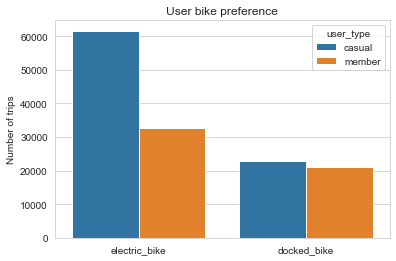

In [67]:
#Which bike type does each user prefer?
sn.countplot(data = trip, x = 'bike_type', hue='user_type')
plt.title('User bike preference')
plt.ylabel('Number of trips')
plt.xlabel('');

> As expected, users prefer electric bikes to docked type. However, the casual users' love for electric bikes is more conspicuous here.

### What period of the day do users usually take rides?

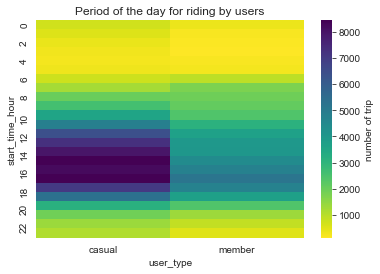

In [15]:
# Visualing the time of the day users like to take rides
cat_means = trip.groupby(['start_time_hour', 'user_type']).size()
cat_means = cat_means.reset_index(name = 'trips')
cat_means = cat_means.pivot(index = 'start_time_hour', columns = 'user_type',
                             values = 'trips')
sn.heatmap(cat_means, cmap = 'viridis_r',
           cbar_kws = {'label' : 'number of trip', })
plt.title('Period of the day for riding by users');

>As has earlier observed, casual users have a higher number of trips and users generally make more rides in the evening periods.

## Multivariate Exploration

In [4]:
 def mean_poly(x,y, bins, bin_size, **kwargs):
    """ Custom errorbar plot for multivariable, 
    two numerical and one categorical """
    
    # set bin centers
    bin_centers = (bins + bin_size/2)[:-1]

    # Use pandas cut function to aggregate the trip durations based on the bin
    # compute mean in each bin
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    mean = y.groupby(data_bins).mean()

    # plot the summarized data
    plt.errorbar(x = bin_centers, y = mean, **kwargs)

### Do trips taken with an electric bike shorter in duration for any period of the day? 

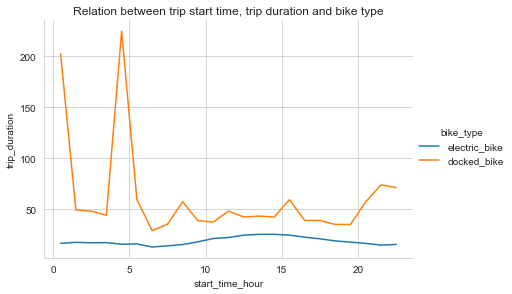

In [7]:
# Relation between trip start time, trip duration and bike type
bin_edges = np.arange(0, trip['start_time_hour'].max()+1, 1)
g = sn.FacetGrid(data = trip, hue = 'bike_type', height = 4, aspect=1.5)
g.map(mean_poly, "start_time_hour", "trip_duration", bins = bin_edges, bin_size = 1)
g.add_legend()
plt.title('Relation between trip start time, trip duration and bike type') ;

> It is now evident that trips done using docked bikes takes longer time. The electric bikes on the other hand take less time for any day period. This difference is quite significant. It is also clear now that the spike observed during the bivariate exploration between duration and time of start is due to docked bikes.

> It would be a good move if Fordgo company considers investments in electric bikes.

### Is the trip duration for electric bikes across the week shorter for any day period?

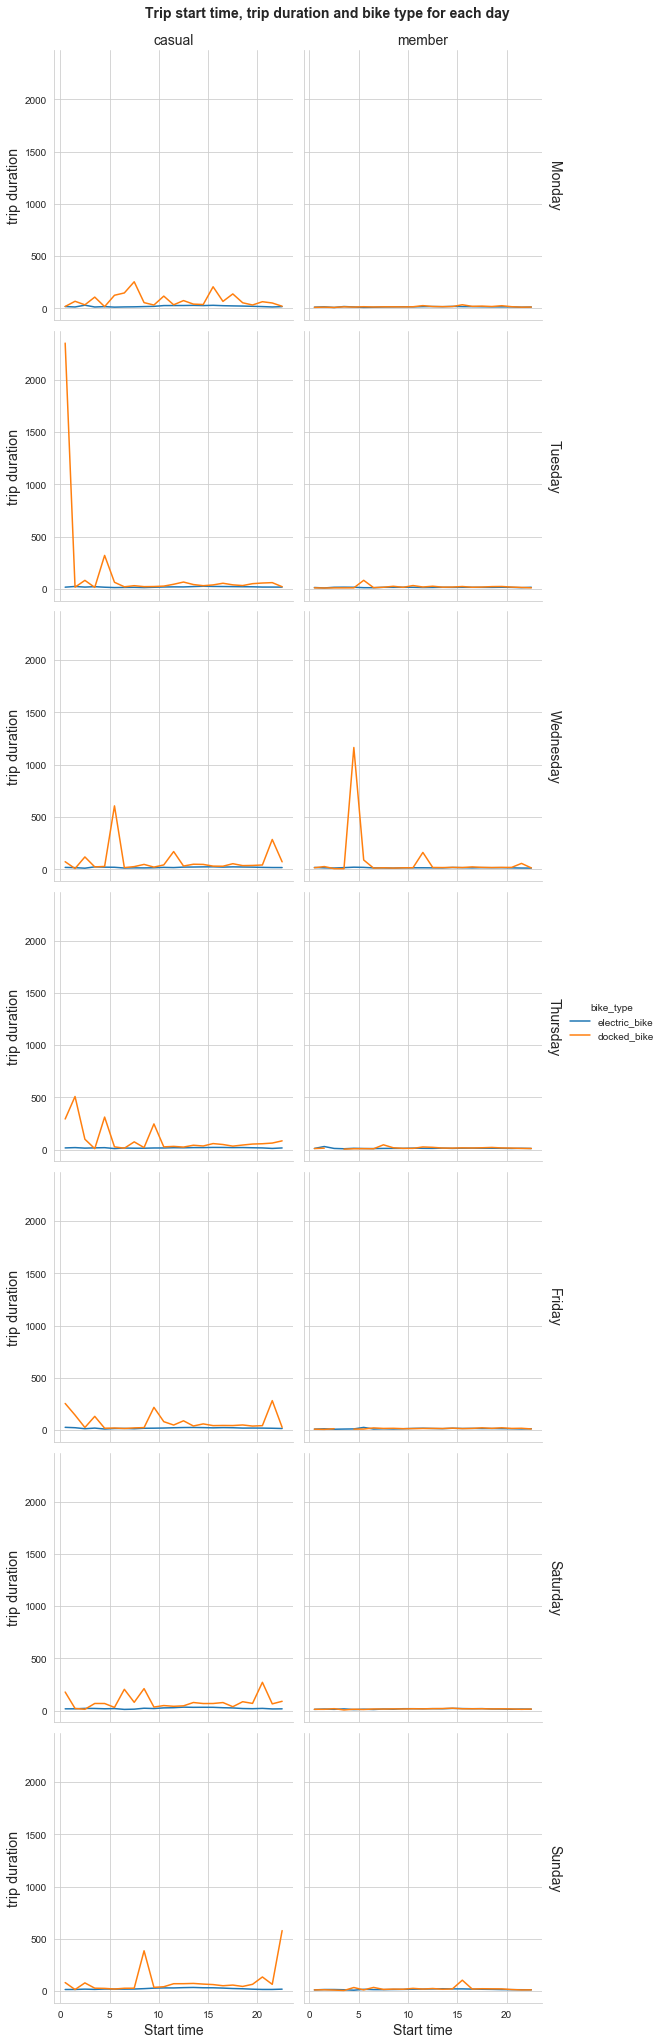

In [68]:
# Relation between trip start time, trip duration and bike type for each day
bin_edges = np.arange(0, trip['start_time_hour'].max()+1, 1)
g = sn.FacetGrid(data = trip, hue = 'bike_type', col = 'user_type', 
                 row_order=order,
                 row = 'start_time_weekday', height = 4, 
                 aspect=1, margin_titles=True)
g.map(mean_poly, "start_time_hour", "trip_duration", 
      bins = bin_edges, bin_size = 1)
g.add_legend()
for ax in g.axes.flat:
    plt.setp(ax.texts, text="")
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 14)
g.set_axis_labels('Start time', 'trip duration') 
g.fig.suptitle('Trip start time, trip duration and bike type for each day', 
               y=1.01, fontsize=14, fontweight='bold');

> Trip duration for subscribed users are almost the same for all periods of the day for all week days, using any of the bikes, except for Wednesday, which had a difference between the hours of 4-5am and 10-12 am. 

> The casual users had significant differences in trip durations for the bike types across the entire week.

### Let's corroborate the reports by visualizing dataset in the more concentrated area - without the outliers

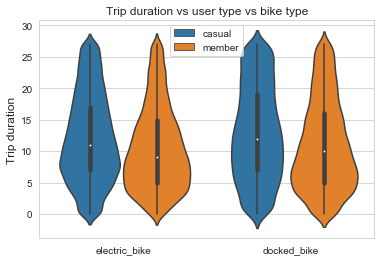

In [59]:
#Trip duration vs user type vs bike type
trip_sub = trip.loc[trip['trip_duration'] < 28]
sn.violinplot(data = trip_sub, x = 'bike_type', y = 'trip_duration', hue = 'user_type')
plt.legend(loc=9)
plt.title('Trip duration vs user type vs bike type')
plt.ylabel('Trip duration', fontsize = 12)
plt.xlabel('');

> It was observed during the data wrangling progress that 75% of trip duration is below 28 minutes. So, I trimmed the data to capture only that range to have clear distribution of the data.

> As indicated in the visual above, the trip durations for subscribed users (members) are less compared to the casual users. There is also more trips taken by members with lesser durations as indicated by the shape of the plot.

> This suggest that members use bikes more for official purposes.

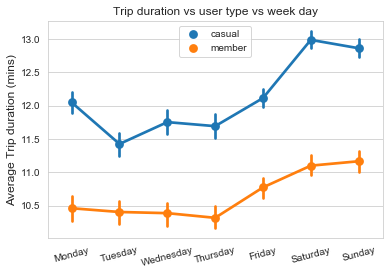

In [66]:
#Trip duration vs user type vs week day
trip_sub = trip.loc[trip['trip_duration'] < 28]
sn.pointplot(data = trip_sub, x = 'start_time_weekday', y = 'trip_duration', 
           hue = 'user_type', order = order)
plt.legend(loc=9)
plt.title('Trip duration vs user type vs week day')
plt.ylabel('Average Trip duration (mins)', fontsize = 12)
plt.xlabel('')
plt.xticks(rotation = 15);

> The average trip duaration for members decreased slightly from Monday to Thursday. However, it appreciated for the rest of the week. The average duration is smaller than that of casual users.

> The average trip for casual users decreased and increased alternately from Monday through Thursday. It then increased steadily to Saturday and decreased again.

> Generally, users spent more time on trips on weekends.

## Summary

- The Fordgo company received the highest patronage from casual users in May 2020
- The preference for electric bikes is high among users.
- Electric bikes are faster.
- Subscribed users (members) generally ride short distances
- The casual users generally use bike services more for outdoor activities, hence they spend more time on rides.
- More rides are done on weekends.
- Users ride more often during evening hours.
- Trips started around 12am and 4-5am takes more.

## References

- [Visualization with Matplotlib](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)
- [Seaborn documentation](https://seaborn.pydata.org/)
- [Matplotlib documentation](https://matplotlib.org/)